<a href="https://www.kaggle.com/code/azum91/us-patent-data-analysis?scriptVersionId=111214480" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-patent-phrase-to-phrase-matching/sample_submission.csv
/kaggle/input/us-patent-phrase-to-phrase-matching/train.csv
/kaggle/input/us-patent-phrase-to-phrase-matching/test.csv


In [20]:
# We load our training dataset here
df_us_patent = pd.read_csv('/kaggle/input/us-patent-phrase-to-phrase-matching/train.csv')
print(df_us_patent.head())

                 id     anchor                  target context  score
0  37d61fd2272659b1  abatement  abatement of pollution     A47   0.50
1  7b9652b17b68b7a4  abatement          act of abating     A47   0.75
2  36d72442aefd8232  abatement         active catalyst     A47   0.25
3  5296b0c19e1ce60e  abatement     eliminating process     A47   0.50
4  54c1e3b9184cb5b6  abatement           forest region     A47   0.00


## We Visualize the Dynamics of the data.
### 1. How many different Anchors we have
### 2. The Score Distribution overall
### 3. And the Score mean/mode/median across all anchors


In [21]:
# Total Number of Examples in the dataset
print('Total Number of Examples in the dataset: {}'.format(len(df_us_patent)))

#total Number of Unique of anchors
unique_anchors_count = df_us_patent['anchor'].nunique()
print('Number of Unique Anchors: {}'.format(unique_anchors_count))

# The mean of the overall scores
print('Mean of overrall Scores: {}'.format(df_us_patent['score'].mean()))

# The mode of the overall scores
print('Mode of overrall Scores: {}'.format(df_us_patent['score'].mode()))


# The median of the overall scores
print('Median of overrall Scores: {}'.format(df_us_patent['score'].median()))

#The anchors by words
unique_anchors = df_us_patent['anchor'].unique()
print('Unique Anchors List: \n {} '.format(unique_anchors[:100]))



Total Number of Examples in the dataset: 36473
Number of Unique Anchors: 733
Mean of overrall Scores: 0.36206234748992405
Mode of overrall Scores: 0    0.5
dtype: float64
Median of overrall Scores: 0.25
Unique Anchors List: 
 ['abatement' 'abnormal position' 'absorbent properties' 'acan'
 'accept information' 'achieve authentication' 'acid absorption' 'ack'
 'acoustooptic modulator' 'acrylate groups' 'activating position'
 'acylate with acids' 'adapt for learning' 'adaptive linear'
 'adhesive mounting' 'adjacent laterally' 'adjust gas flow'
 'adjustable multiple' 'aesthetic effects' 'agitate means' 'air flow line'
 'air vent openings' 'align with input shaft' 'alpha gypsum' 'alphatic'
 'aluminium compounds' 'alumino silicates' 'ammonia recovery'
 'androgen receptor modulators' 'angular contact bearing' 'animal fats'
 'annular ends' 'annular neck' 'antiatherosclerotic' 'antidiuretic'
 'antigen composition' 'apart elongated' 'application messaging'
 'apply on tube' 'apply to anode electr

unique count of score to check the distribution of classes: 
0.50    12300
0.25    11519
0.00     7471
0.75     4029
1.00     1154
Name: score, dtype: int64


array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

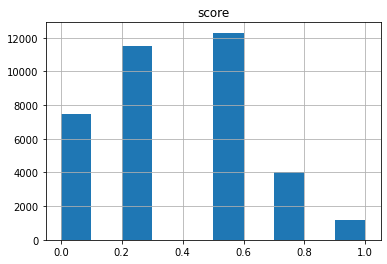

In [22]:
# Examples per score
unqiue_count_per_score = df_us_patent['score'].value_counts()
print('unique count of score to check the distribution of classes: \n{}'.format(unqiue_count_per_score))
df_us_patent.hist(column='score')

Distribution of the Score in terms of Percentage
0.50    0.337236
0.25    0.315823
0.00    0.204836
0.75    0.110465
1.00    0.031640
Name: score, dtype: float64


<AxesSubplot:ylabel='score'>

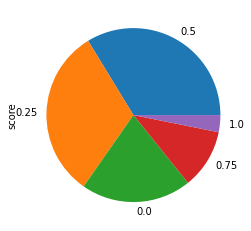

In [23]:
# Percentage Wise Distribution Pie Plot
print('Distribution of the Score in terms of Percentage')
print(df_us_patent['score'].value_counts()/df_us_patent['score'].value_counts().sum())
(df_us_patent['score'].value_counts()/df_us_patent['score'].value_counts().sum()).plot.pie()

#### From above results we see that class 1.00 would have hard-time getting model to learn its pattern.

## Now we analyze word count pattren


In [24]:
# function to apply to dataframe to count words on the data set, 
def get_words_count(row,column_name):
    max_count = 0 
    text = row[column_name]
    words = text.split(' ')
    count = len(words)
    #print(text, count)
    return count
        
df_us_patent['anchor_word_count'] = df_us_patent.apply(get_words_count,args=['anchor'],axis=1) # Word counts on the anchor column
df_us_patent['target_word_count'] = df_us_patent.apply(get_words_count,args=['target'],axis=1) # Word counts on the target column

print('Data Sample 10: {}'.format(df_us_patent.head(10)))
print('\n Max Number of Words: {}'.format(df_us_patent['anchor_word_count'].max()))
print('Average Number of Words accross Anchor: {}'.format(df_us_patent['anchor_word_count'].mean()))
print('Most Common Length of Anchor: {}'.format(df_us_patent['anchor_word_count'].mode()))
print('Total Number of example in our dataset before removing outliers: {}'.format(len(df_us_patent)))

print('\n Target Column Word  \n')
    

print('Max Number of Words: {}'.format(df_us_patent['target_word_count'].max()))
print('Average Number of Words accross Anchor: {}'.format(df_us_patent['target_word_count'].mean()))
print('Most Common Length of Target: {}'.format(df_us_patent['target_word_count'].mode()))
print('Total Number of example in our dataset before removing outliers: {}'.format(len(df_us_patent)))

Data Sample 10:                  id     anchor                  target context  score  \
0  37d61fd2272659b1  abatement  abatement of pollution     A47   0.50   
1  7b9652b17b68b7a4  abatement          act of abating     A47   0.75   
2  36d72442aefd8232  abatement         active catalyst     A47   0.25   
3  5296b0c19e1ce60e  abatement     eliminating process     A47   0.50   
4  54c1e3b9184cb5b6  abatement           forest region     A47   0.00   
5  067203128142739c  abatement        greenhouse gases     A47   0.25   
6  061d17f04be2d1cf  abatement          increased rate     A47   0.25   
7  e1f44e48399a2027  abatement       measurement level     A47   0.25   
8  0a425937a3e86d10  abatement       minimising sounds     A47   0.50   
9  ef2d4c2e6bbb208d  abatement   mixing core materials     A47   0.25   

   anchor_word_count  target_word_count  
0                  1                  3  
1                  1                  3  
2                  1                  2  
3           

#### From above analysis we know that dynamic of words in both columns, which will help us build relation among them.
#### We also have insight to how we should go about balancing classes

In [25]:
import tensorflow as tf
import transformers
transformers.logging.set_verbosity_error()



# Defining Configurations

max_length = 10  # Maximum length of input sentence to the model.
lr = 0.00001 # Initial learning rate can be set in the configurations.
batch_size = 64
epochs = 50
validation_split = 0.2

# Labels in our dataset.
labels = [0.00, 0.25, 0.50, 0.75, 1.00]

In [26]:
# here we do missing values analysis
print("Number of missing values")
print(df_us_patent.isnull().sum())

Number of missing values
id                   0
anchor               0
target               0
context              0
score                0
anchor_word_count    0
target_word_count    0
dtype: int64


In [27]:
# Adding labels
df_us_patent["label"] = df_us_patent["score"].apply(
    lambda x: 0 if x == 0.00 else 1 if x == 0.25 else 2 if x == 0.50 else 3 if x == 0.75 else 4
)

In [28]:
# Looking at our added labels
df_us_patent.head

<bound method NDFrame.head of                      id        anchor                  target context  score  \
0      37d61fd2272659b1     abatement  abatement of pollution     A47   0.50   
1      7b9652b17b68b7a4     abatement          act of abating     A47   0.75   
2      36d72442aefd8232     abatement         active catalyst     A47   0.25   
3      5296b0c19e1ce60e     abatement     eliminating process     A47   0.50   
4      54c1e3b9184cb5b6     abatement           forest region     A47   0.00   
...                 ...           ...                     ...     ...    ...   
36468  8e1386cbefd7f245  wood article          wooden article     B44   1.00   
36469  42d9e032d1cd3242  wood article              wooden box     B44   0.50   
36470  208654ccb9e14fa3  wood article           wooden handle     B44   0.50   
36471  756ec035e694722b  wood article         wooden material     B44   0.75   
36472  8d135da0b55b8c88  wood article        wooden substrate     B44   0.50   

       an

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
# Used for class_weights shift in case of class imbalance data.

#Spliting the train/test with 50% dataset for training and 50% for testing

X = df_us_patent[["anchor","target"]] # getting reviws from the dataset for training
y = df_us_patent['label'] # getting ratings of the reviws

X_train, x_val, y_train, y_val = train_test_split(
     X, y, test_size=validation_split, random_state=42) #used for train test split
print(len(X_train))
classes_weights  = class_weight.compute_class_weight(class_weight= 'balanced',classes=np.unique(y),y=y)

classes_weights_dict  = dict(enumerate(classes_weights))
print('We Calculate the class weights of so that we can train our model well on lower number of classes \n {}'.format(type(classes_weights_dict)))
print(classes_weights_dict)

29178
We Calculate the class weights of so that we can train our model well on lower number of classes 
 <class 'dict'>
{0: 0.9763887029848749, 1: 0.6332667766299158, 2: 0.5930569105691057, 3: 1.8105237031521468, 4: 6.321143847487002}


In [30]:
y_train_ca = tf.keras.utils.to_categorical(y_train, num_classes=5)
y_val_ca = tf.keras.utils.to_categorical(y_val, num_classes=5)

In [31]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [32]:
class BertSemanticDataGenerator(tf.keras.utils.Sequence):
    """Generates batches of data.

    Args:
        sentence_pairs: Array of premise and hypothesis input sentences.
        labels: Array of labels.
        batch_size: Integer batch size.
        shuffle: boolean, whether to shuffle the data.
        include_targets: boolean, whether to incude the labels.

    Returns:
        Tuples `([input_ids, attention_mask, `token_type_ids], labels)`
        (or just `[input_ids, attention_mask, `token_type_ids]`
         if `include_targets=False`)
    """

    def __init__(
        self,
        sentence_pairs,
        labels,
        batch_size=batch_size,
        shuffle=False,
        include_targets=True,
    ):
        self.sentence_pairs = sentence_pairs
        self.labels = labels
        self.shuffle = shuffle
        self.batch_size = batch_size
        self.include_targets = include_targets
        # Load our BERT Tokenizer to encode the text.
        # We will use base-base-uncased pretrained model.
        self.tokenizer = transformers.BertTokenizer.from_pretrained(
            "bert-base-uncased", do_lower_case=True
        )
        self.indexes = np.arange(len(self.sentence_pairs))
        self.on_epoch_end()
        
    def __len__(self):
        # Denotes the number of batches per epoch.
        # np.ceil added 
        return int(np.ceil(len(self.sentence_pairs) / self.batch_size))

    def __getitem__(self, idx):
        # Retrieves the batch of index. 
        # entire if condition added by me
        if (idx) * self.batch_size > len(self.sentence_pairs):
            last_idx = ( idx * self.batch_size ) + ((len(self.sentence_pairs)) - ((idx + 1) * self.batch_size))
            indexes = self.indexes[idx * self.batch_size : last_idx ]
            sentence_pairs = self.sentence_pairs[indexes]
        else:
            indexes = self.indexes[idx * self.batch_size : (idx + 1) * self.batch_size]
            sentence_pairs = self.sentence_pairs[indexes]

        # With BERT tokenizer's batch_encode_plus batch of both the sentences are
        # encoded together and separated by [SEP] token.
        encoded = self.tokenizer.batch_encode_plus(
            sentence_pairs.tolist(),
            add_special_tokens=True,
            max_length=max_length,
            return_attention_mask=True,
            return_token_type_ids=True,
            padding='max_length',
            return_tensors="tf",
            truncation=True,
        )
        #/opt/conda/lib/python3.7/site-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
 # FutureWarning, '''

        # Convert batch of encoded features to numpy array.
        input_ids = np.array(encoded["input_ids"], dtype="int32")
        attention_masks = np.array(encoded["attention_mask"], dtype="int32")
        token_type_ids = np.array(encoded["token_type_ids"], dtype="int32")

        # Set to true if data generator is used for training/validation.
        if self.include_targets:
            labels = np.array(self.labels[indexes], dtype="int32")
            return [input_ids, attention_masks, token_type_ids], labels
        else:
            return [input_ids, attention_masks, token_type_ids]

    def on_epoch_end(self):
        # Shuffle indexes after each epoch if shuffle is set to True.
        if self.shuffle:
            np.random.RandomState(42).shuffle(self.indexes)

In [33]:
#strategy = tf.distribute.MirroredStrategy()

#with strategy.scope():
    # Encoded token ids from BERT tokenizer.
input_ids = tf.keras.layers.Input(
        shape=(max_length,), dtype=tf.int32, name="input_ids"
)
    # Attention masks indicates to the model which tokens should be attended to.
attention_masks = tf.keras.layers.Input(
        shape=(max_length,), dtype=tf.int32, name="attention_masks"
)
    # Token type ids are binary masks identifying different sequences in the model.
token_type_ids = tf.keras.layers.Input(
        shape=(max_length,), dtype=tf.int32, name="token_type_ids"
)
    # Loading pretrained BERT model.
bert_model = transformers.TFBertModel.from_pretrained("bert-base-uncased")
    # Freeze the BERT model to reuse the pretrained features without modifying them.
bert_model.trainable = False

bert_output = bert_model(
        input_ids, attention_mask=attention_masks, token_type_ids=token_type_ids
)
sequence_output = bert_output.last_hidden_state
pooled_output = bert_output.pooler_output
    # Add trainable layers on top of frozen layers to adapt the pretrained features on the new data.
bi_lstm = tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(64, return_sequences=True)
    )(sequence_output)
    # Applying hybrid pooling approach to bi_lstm sequence output.
avg_pool = tf.keras.layers.GlobalAveragePooling1D()(bi_lstm)
max_pool = tf.keras.layers.GlobalMaxPooling1D()(bi_lstm)
concat = tf.keras.layers.concatenate([avg_pool, max_pool])
dropout = tf.keras.layers.Dropout(0.2)(concat)
output = tf.keras.layers.Dense(5, activation="softmax")(dropout)
model = tf.keras.models.Model(
        inputs=[input_ids, attention_masks, token_type_ids], outputs=output
    )
    
model.compile(
        optimizer=tf.keras.optimizers.Adam(lr),
        loss="categorical_crossentropy",
        metrics=["acc"]
    )



#print(f"Strategy: {strategy}")
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 10)]         0                                            
__________________________________________________________________________________________________
attention_masks (InputLayer)    [(None, 10)]         0                                            
__________________________________________________________________________________________________
token_type_ids (InputLayer)     [(None, 10)]         0                                            
__________________________________________________________________________________________________
tf_bert_model_1 (TFBertModel)   TFBaseModelOutputWit 109482240   input_ids[0][0]                  
                                                                 attention_masks[0][0]      

In [34]:
# Creating Generator To feed model with training and validation samples

train_data = BertSemanticDataGenerator(
    X_train[["anchor", "target"]].values.astype("str"),
    y_train_ca,
    batch_size=batch_size,
    shuffle=False,
)
valid_data = BertSemanticDataGenerator(
    x_val[["anchor", "target"]].values.astype("str"),
    y_val_ca,
    batch_size=batch_size,
    shuffle=False,
)

In [35]:
# Creating model checkpoint and learning rate schedule
from tensorflow.keras.callbacks import ModelCheckpoint #used for saving best trained model

from tensorflow.keras.optimizers import Adam # The model optimizer

# This function keeps the initial learning rate for the first ten epochs
# and decreases it exponentially after that.

def scheduler(epoch, lr):
   if epoch < 10:
     return lr
   elif (epoch % 5 == 0):
     return lr * tf.math.exp(-0.1)
   else:
     return lr
    

learning_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler) # applying adaptive learning rate to the model.

adam = Adam(learning_rate=lr) # To change the learning rate


model_save_name = "./SemanticModel" #name to save model

checkpoint = ModelCheckpoint(model_save_name, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

callback_feed = [checkpoint, learning_schedule]


In [36]:
history = model.fit(
    train_data,
    batch_size = batch_size,
    validation_data=valid_data,
    epochs=epochs,
    use_multiprocessing=True,
    callbacks = callback_feed,
    workers=-1
)

Epoch 1/50
456/456 [==============================] - 62s 106ms/step - loss: 1.4951 - acc: 0.3098 - val_loss: 1.3756 - val_acc: 0.4137

Epoch 00001: val_acc improved from -inf to 0.41371, saving model to ./SemanticModel
Epoch 2/50
456/456 [==============================] - 44s 97ms/step - loss: 1.3758 - acc: 0.4010 - val_loss: 1.3319 - val_acc: 0.4467

Epoch 00002: val_acc improved from 0.41371 to 0.44674, saving model to ./SemanticModel
Epoch 3/50
456/456 [==============================] - 49s 107ms/step - loss: 1.3435 - acc: 0.4265 - val_loss: 1.2996 - val_acc: 0.4622

Epoch 00003: val_acc improved from 0.44674 to 0.46223, saving model to ./SemanticModel
Epoch 4/50
456/456 [==============================] - 45s 98ms/step - loss: 1.3200 - acc: 0.4414 - val_loss: 1.2741 - val_acc: 0.4662

Epoch 00004: val_acc improved from 0.46223 to 0.46621, saving model to ./SemanticModel
Epoch 5/50
456/456 [==============================] - 45s 98ms/step - loss: 1.3009 - acc: 0.4467 - val_loss: 1.25

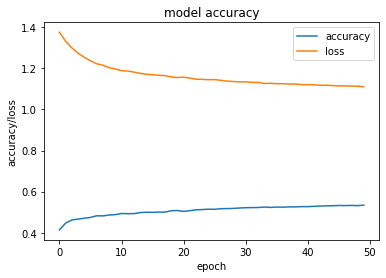

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_acc'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

In [38]:
#Fine Tuning
bert_model.trainable = True
model.compile(
        optimizer=tf.keras.optimizers.Adam(lr),
        loss="categorical_crossentropy",
        metrics=["acc"]
)

history_fineTuning = model.fit(
    train_data,
    batch_size = batch_size,
    validation_data=valid_data,
    epochs=epochs,
    use_multiprocessing=True,
    callbacks = callback_feed,
    workers=-1
)



Epoch 1/50
456/456 [==============================] - 94s 162ms/step - loss: 1.0474 - acc: 0.5672 - val_loss: 0.9131 - val_acc: 0.6263

Epoch 00001: val_acc improved from 0.53420 to 0.62632, saving model to ./SemanticModel
Epoch 2/50
456/456 [==============================] - 73s 160ms/step - loss: 0.8829 - acc: 0.6403 - val_loss: 0.8780 - val_acc: 0.6458

Epoch 00002: val_acc improved from 0.62632 to 0.64578, saving model to ./SemanticModel
Epoch 3/50
456/456 [==============================] - 72s 159ms/step - loss: 0.7790 - acc: 0.6862 - val_loss: 0.8364 - val_acc: 0.6651

Epoch 00003: val_acc improved from 0.64578 to 0.66511, saving model to ./SemanticModel
Epoch 4/50
456/456 [==============================] - 72s 158ms/step - loss: 0.6842 - acc: 0.7268 - val_loss: 0.8350 - val_acc: 0.6769

Epoch 00004: val_acc improved from 0.66511 to 0.67690, saving model to ./SemanticModel
Epoch 5/50
456/456 [==============================] - 72s 159ms/step - loss: 0.6060 - acc: 0.7613 - val_loss

In [39]:
# We load our training dataset here
df_us_patent = pd.read_csv('/kaggle/input/us-patent-phrase-to-phrase-matching/test.csv')
print(df_us_patent.head())

                 id              anchor                         target context
0  4112d61851461f60            opc drum  inorganic photoconductor drum     G02
1  09e418c93a776564     adjust gas flow              altering gas flow     F23
2  36baf228038e314b      lower trunnion                 lower locating     B60
3  1f37ead645e7f0c8       cap component                  upper portion     D06
4  71a5b6ad068d531f  neural stimulation      artificial neural network     H04


In [40]:

model_new = tf.keras.models.load_model('./SemanticModel')

ValueError: The two structures don't have the same nested structure.

First structure: type=tuple str=(({'input_ids': TensorSpec(shape=(None, 5), dtype=tf.int32, name='input_ids/input_ids')}, None, None, None, None, None, None, None, None, None, None, None, None, False), {})

Second structure: type=tuple str=((TensorSpec(shape=(None, 10), dtype=tf.int32, name='input_ids'), TensorSpec(shape=(None, 10), dtype=tf.int32, name='attention_mask'), TensorSpec(shape=(None, 10), dtype=tf.int32, name='token_type_ids'), None, None, None, None, None, None, None, None, None, None, False), {})

More specifically: Substructure "type=dict str={'input_ids': TensorSpec(shape=(None, 5), dtype=tf.int32, name='input_ids/input_ids')}" is a sequence, while substructure "type=TensorSpec str=TensorSpec(shape=(None, 10), dtype=tf.int32, name='input_ids')" is not
Entire first structure:
(({'input_ids': .}, ., ., ., ., ., ., ., ., ., ., ., ., .), {})
Entire second structure:
((., ., ., ., ., ., ., ., ., ., ., ., ., .), {})

# We start Testing from here:
### Our main focus will be on values below:
#### 1. Recall
#### 2. Precision
####       &
#### 3. F1-Score
## we will also visualize the confusion matrix to see the distribution of predicted classes
## we will use the validation data for this purpose

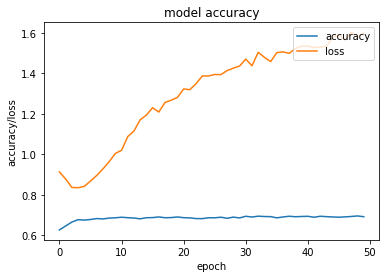

In [45]:
import matplotlib.pyplot as plt
plt.plot(history_fineTuning.history['val_acc'])
plt.plot(history_fineTuning.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

In [41]:
prediction_val = model.predict(valid_data)

In [44]:
print(len(prediction_val))
    
# we get the classes by using maximum

predicted_classes_val =  np.argmax(prediction_val,axis=1)
print(predicted_classes_val)



7295
[1 1 1 ... 2 0 0]


In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    y_true_for_class = np.array(y_true,dtype=int)
    y_pred_for_class = np.array(y_pred,dtype=int)
    #classes = classes[unique_labels(y_true_for_class, y_pred_for_class)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    #fig.()
    #plt.savefig(file_path+ title+'.png')
    return ax

Confusion matrix, without normalization
[[1006  365  108   23    1]
 [ 128 1765  351   54    5]
 [  55  470 1661  229   23]
 [  13   58  265  452   46]
 [   2    3   21   30  161]]


<AxesSubplot:title={'center':'Confusion Matrix Without Weights Balanced'}, xlabel='Predicted label', ylabel='True label'>

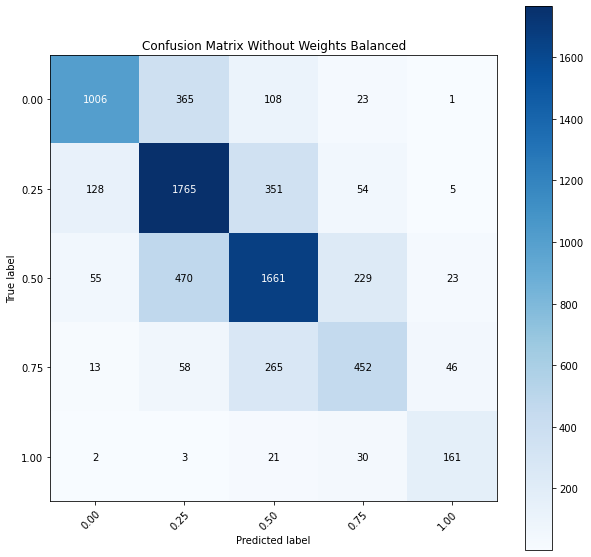

In [47]:
class_labels = ['0.00','0.25','0.50','0.75','1.00']
plot_confusion_matrix(y_val.astype(str),predicted_classes_val.astype(str),classes=class_labels,title='Confusion Matrix Without Weights Balanced')

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('Results without Class Weight Balanced')
# average is using with argumented weighted in case of multiclass classification
res_f1 = f1_score(y_val,predicted_classes_val,average='weighted')
print('F1 Score: {} '.format(res_f1))
res_rc = recall_score(y_val,predicted_classes_val,average='weighted')
print('Recall Score: {}'.format(res_rc))
res_prec = precision_score(y_val,predicted_classes_val,average='weighted')
print('Precision Score: {}'.format(res_prec))

# Test Submission Starts from here.

In [48]:
# Reading the testset of the kaggle
df_test = pd.read_csv('/kaggle/input/us-patent-phrase-to-phrase-matching/test.csv')
print(df_test.head())


                 id              anchor                         target context
0  4112d61851461f60            opc drum  inorganic photoconductor drum     G02
1  09e418c93a776564     adjust gas flow              altering gas flow     F23
2  36baf228038e314b      lower trunnion                 lower locating     B60
3  1f37ead645e7f0c8       cap component                  upper portion     D06
4  71a5b6ad068d531f  neural stimulation      artificial neural network     H04


In [49]:
# Generator for the test_data
test_data = BertSemanticDataGenerator(
    df_test[["anchor", "target"]].values.astype("str"),
    batch_size=6,
    shuffle=False,
    include_targets=False,
    labels=[]
)

In [50]:

results_test = model.predict(test_data,verbose=1)

6/6 [==============================] - 3s 30ms/step


In [52]:
predicted_classes_index = np.argmax(results_test,axis=1)

In [53]:
predicted_score = []
for i in range(0,len(predicted_classes_index)):
    idx = predicted_classes_index[i]
    predicted_score.append(class_labels[idx])
print (predicted_score)

['0.25', '0.75', '0.50', '0.25', '0.00', '0.50', '0.50', '0.00', '0.25', '1.00', '0.25', '0.25', '0.75', '1.00', '0.75', '0.25', '0.25', '0.00', '0.50', '0.50', '0.50', '0.25', '0.00', '0.25', '0.50', '0.00', '0.00', '0.00', '0.00', '0.50', '0.00', '0.00', '0.75', '0.50', '0.25', '0.25']


In [54]:
df_score = pd.DataFrame(predicted_score , columns =['score'])
df_submission = pd.concat([df_test[['id']],df_score],axis=1)
print(df_submission)
df_submission.to_csv('submission.csv')

                  id score
0   4112d61851461f60  0.25
1   09e418c93a776564  0.75
2   36baf228038e314b  0.50
3   1f37ead645e7f0c8  0.25
4   71a5b6ad068d531f  0.00
5   474c874d0c07bd21  0.50
6   442c114ed5c4e3c9  0.50
7   b8ae62ea5e1d8bdb  0.00
8   faaddaf8fcba8a3f  0.25
9   ae0262c02566d2ce  1.00
10  a8808e31641e856d  0.25
11  16ae4b99d3601e60  0.25
12  25c555ca3d5a2092  0.75
13  5203a36c501f1b7c  1.00
14  b9fdc772bb8fd61c  0.75
15  7aa5908a77a7ec24  0.25
16  d19ef3979396d47e  0.25
17  fd83613b7843f5e1  0.00
18  2a619016908bfa45  0.50
19  733979d75f59770d  0.50
20  6546846df17f9800  0.50
21  3ff0e7a35015be69  0.25
22  12ca31f018a2e2b9  0.00
23  03ba802ed4029e4d  0.25
24  c404f8b378cbb008  0.50
25  78243984c02a72e4  0.00
26  de51114bc0faec3e  0.00
27  7e3aff857f056bf9  0.00
28  26c3c6dc6174b589  0.00
29  b892011ab2e2cabc  0.50
30  8247ff562ca185cc  0.00
31  c057aecbba832387  0.00
32  9f2279ce667b21dc  0.75
33  b9ea2b06a878df6f  0.50
34  79795133c30ef097  0.25
35  25522ee5411e63e9  0.25


In [ ]:
models = tf.keras.models.load_model('./2_Adam_1e-05_0.264.h5')